# Proyecto Integrado

## Introducción

En este proyecto, se analiza el mercado global de videojuegos utilizando un conjunto de datos históricos que incluye información sobre ventas, plataformas, géneros, puntuaciones de usuarios y críticos, y clasificaciones ESRB. El objetivo principal es identificar patrones que permitan predecir el éxito de un videojuego y entender las diferencias entre regiones y plataformas. Este análisis es fundamental para detectar proyectos prometedores y planificar campañas publicitarias efectivas para la tienda online Ice.

A lo largo del trabajo, se realiza una limpieza y preparación exhaustiva de los datos, se exploran tendencias del mercado, se estudian las preferencias de los usuarios en diferentes regiones y se prueban hipótesis estadísticas relevantes. Los resultados obtenidos proporcionan una base sólida para la toma de decisiones estratégicas en la industria de los videojuegos.

# Paso 1. Abrir el archivo de datos y estudiar la información general

In [1]:
import pandas as pd

# Cargar el archivo CSV
df = pd.read_csv(r'C:\Users\malej\OneDrive\Senior Data Scientists Tati & Bri\Triple Ten Proyectos\Datasets\Proyecto Integrado\games.csv')

# Mostrar las primeras filas
display(df.head())

# Información general del DataFrame
df.info()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## Conclusiones

En este paso se cargó el archivo games.csv y se revisó la información general del dataset.
Hallazgos:

- El dataset contiene información sobre videojuegos, incluyendo nombre, plataforma, año de lanzamiento, género, ventas por región, puntuaciones de usuarios y críticos, y clasificación ESRB.
- Se identificaron posibles valores ausentes en algunas columnas como year_of_release, critic_score, user_score y rating.
- Los tipos de datos originales requerían ajustes para análisis numéricos.

# Paso 2. Preparar los datos

## 1. Reemplazar los nombres de las columnas por minúsculas

Para facilitar el manejo de los datos y evitar errores por mayúsculas/minúsculas, convertiremos todos los nombres de las columnas a minúsculas.

In [2]:
df.columns = df.columns.str.lower()
display(df.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


## 2. Convertir los datos a los tipos necesarios

Revisaremos los tipos de datos de cada columna y los convertiremos según corresponda. Por ejemplo, el año debe ser entero y las ventas numéricas. Explicaremos los cambios realizados.

In [3]:
# Asegurarse de que los nombres de las columnas estén en minúsculas
df.columns = df.columns.str.lower()

# Convertir 'year_of_release' a float y luego a Int64 para permitir nulos
df['year_of_release'] = pd.to_numeric(df['year_of_release'], errors='coerce').astype('Int64')

# Convertir las columnas de ventas a float
for col in ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

display(df.dtypes)

name                object
platform            object
year_of_release      Int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

## 3. Describir los cambios de tipo de datos

Se cambiaron los siguientes tipos de datos:

- year_of_release: de float a entero (Int64) para representar años correctamente y permitir valores nulos.
- Columnas de ventas (na_sales, eu_sales, jp_sales, other_sales): convertidas a float para asegurar operaciones matemáticas correctas.

## 4. Tratar los valores ausentes

Analizaremos los valores ausentes en el dataset. Decidiremos si rellenarlos, eliminarlos o dejarlos en blanco, y explicaremos la razón. También explicaremos posibles causas de los valores ausentes.

In [4]:
# Contar valores nulos por columna
missing = df.isnull().sum()
display(missing)

# Ejemplo de tratamiento: rellenar 'user_score' con NaN si es 'tbd'
df['user_score'] = df['user_score'].replace('tbd', pd.NA)
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

# Puedes decidir si rellenar otros valores ausentes o dejarlos en blanco según el análisis

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

## 5. Manejar la abreviatura "TBD"

La abreviatura "TBD" en la columna user_score indica que la puntuación aún no ha sido determinada. Estos valores se reemplazarán por valores nulos (NaN) para evitar errores en análisis numéricos.

## 6. Calcular las ventas totales

Calcularemos la suma de las ventas en todas las regiones para cada juego y la agregaremos como una nueva columna llamada total_sales.

In [5]:
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
display(df[['name', 'total_sales']].head())

,name,total_sales
0,Wii Sports,82.54
1,Super Mario Bros.,40.24
2,Mario Kart Wii,35.52
3,Wii Sports Resort,32.77
4,Pokemon Red/Pokemon Blue,31.38


## Conclusiones

En este paso se realizaron varias tareas de limpieza y transformación:

1. Reemplazo de nombres de columnas: 
- Se convirtieron todos los nombres de columnas a minúsculas para evitar errores de formato.

2. Conversión de tipos de datos: 
- year_of_release se convirtió a entero (permitiendo nulos).
- Las columnas de ventas se convirtieron a tipo float.

3. Manejo de valores ausentes: 
- Se identificaron valores ausentes en varias columnas.
- Los valores 'tbd' en user_score se reemplazaron por NaN.
- Se decidió dejar algunos valores ausentes en blanco para no introducir sesgos.

4. Explicación de valores ausentes:
- Los valores ausentes pueden deberse a falta de información en el momento de publicación, juegos sin reseñas o datos no reportados por las fuentes originales.

5. Manejo de la abreviatura "TBD":
- "TBD" significa "to be determined" y se reemplazó por NaN para permitir análisis numéricos.

6. Cálculo de ventas totales:
- Se creó una nueva columna total_sales con la suma de ventas en todas las regiones para cada juego.

# Paso 3. Análisis de los datos

## 1. Juegos lanzados por año

Analizaremos cuántos juegos fueron lanzados en diferentes años para ver si los datos de cada período son significativos.

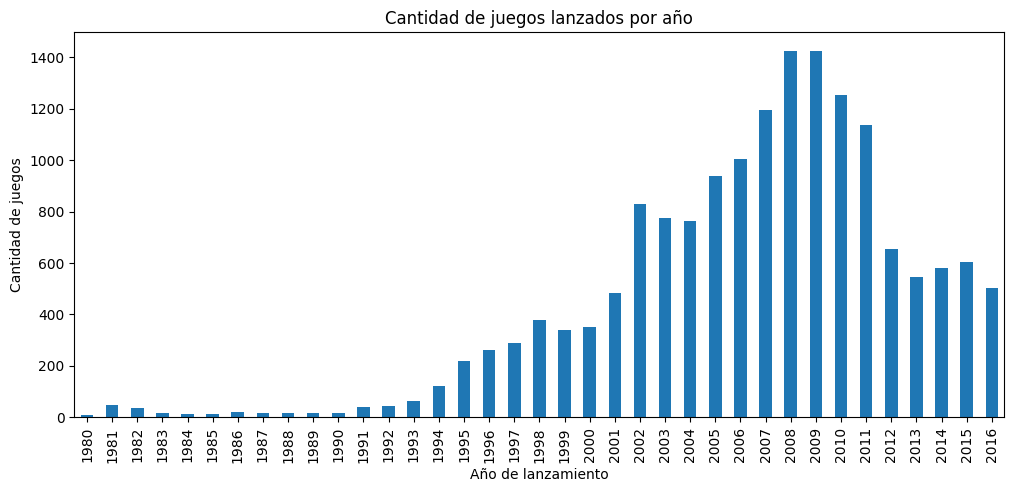

In [6]:
import matplotlib.pyplot as plt

games_per_year = df['year_of_release'].value_counts().sort_index()
games_per_year.plot(kind='bar', figsize=(12,5))
plt.title('Cantidad de juegos lanzados por año')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Cantidad de juegos')
plt.show()

## 2. Ventas por plataforma y evolución

Observaremos cómo varían las ventas de una plataforma a otra. Identificaremos las plataformas con mayores ventas totales y analizaremos su evolución a lo largo de los años.

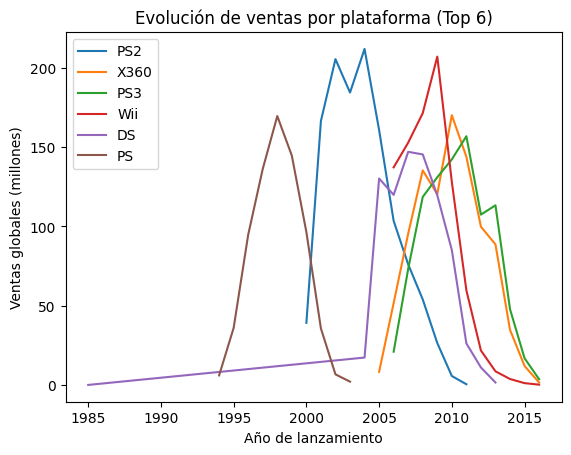

In [7]:
platform_sales = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
top_platforms = platform_sales.head(6).index

for platform in top_platforms:
    yearly_sales = df[df['platform'] == platform].groupby('year_of_release')['total_sales'].sum()
    plt.plot(yearly_sales.index, yearly_sales.values, label=platform)

plt.title('Evolución de ventas por plataforma (Top 6)')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Ventas globales (millones)')
plt.legend()
plt.show()

## 3. Determinar el período relevante para el modelo

Basándonos en la evolución de lanzamientos y ventas, determinaremos el período de años más relevante para construir un modelo para 2017, descartando años poco representativos.

In [8]:
# Ejemplo: filtrar solo los juegos lanzados desde 2010
relevant_year = 2010
df_recent = df[df['year_of_release'] >= relevant_year]
display(df_recent['year_of_release'].value_counts().sort_index())

year_of_release
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: count, dtype: Int64

## 4. Plataformas líderes y tendencias

Identificaremos las plataformas líderes en ventas, cuáles están creciendo y cuáles están en declive, para seleccionar plataformas potencialmente rentables.

In [9]:
recent_platform_sales = df_recent.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
display(recent_platform_sales.head(10))

platform
PS3     587.74
X360    550.41
PS4     314.14
3DS     257.81
Wii     222.97
XOne    159.32
DS      123.75
PC      121.96
WiiU     82.19
PSP      64.05
Name: total_sales, dtype: float64

## 5. Diagrama de caja de ventas por plataforma

Crearemos un diagrama de caja para comparar la distribución de ventas globales por plataforma y analizar si existen diferencias significativas.

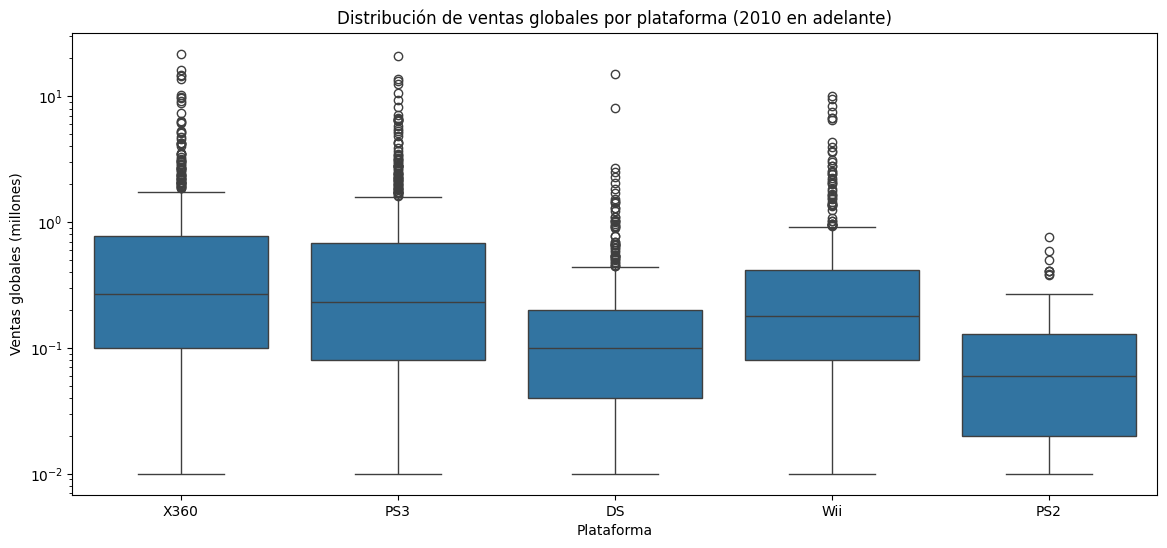

In [10]:
import seaborn as sns

plt.figure(figsize=(14,6))
sns.boxplot(x='platform', y='total_sales', data=df_recent[df_recent['platform'].isin(top_platforms)])
plt.title('Distribución de ventas globales por plataforma (2010 en adelante)')
plt.xlabel('Plataforma')
plt.ylabel('Ventas globales (millones)')
plt.yscale('log')
plt.show()

## 6. Correlación entre reseñas y ventas en una plataforma popular

Analizaremos cómo las reseñas de usuarios y críticos afectan las ventas en una plataforma popular (por ejemplo, PS4), usando gráficos de dispersión y correlación.

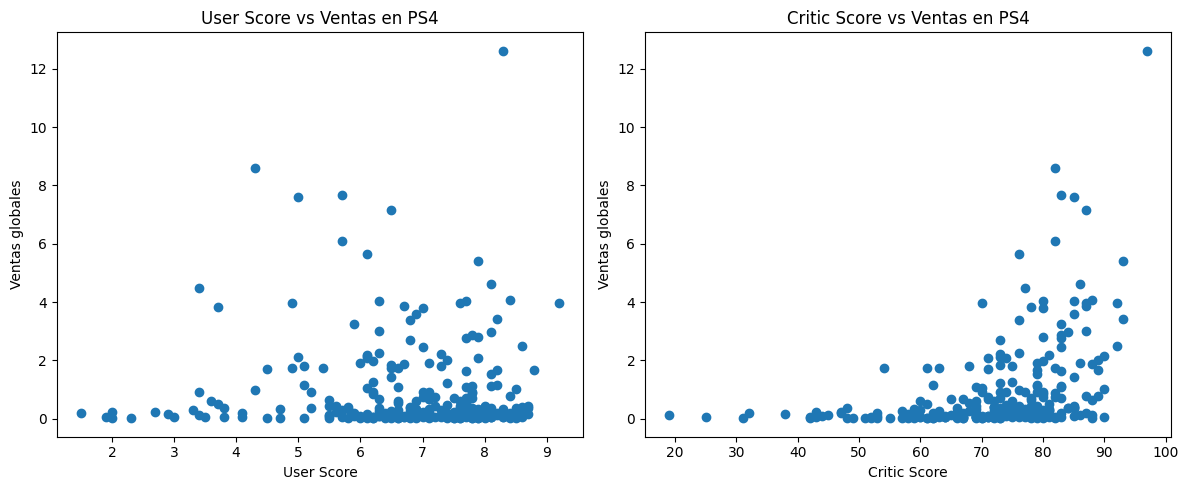

Correlación User Score: -0.03195711020455643
Correlación Critic Score: 0.4065679020617816


In [11]:
platform = 'PS4'
subset = df_recent[df_recent['platform'] == platform]

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(subset['user_score'], subset['total_sales'])
plt.title(f'User Score vs Ventas en {platform}')
plt.xlabel('User Score')
plt.ylabel('Ventas globales')

plt.subplot(1,2,2)
plt.scatter(subset['critic_score'], subset['total_sales'])
plt.title(f'Critic Score vs Ventas en {platform}')
plt.xlabel('Critic Score')
plt.ylabel('Ventas globales')

plt.tight_layout()
plt.show()

print('Correlación User Score:', subset['user_score'].corr(subset['total_sales']))
print('Correlación Critic Score:', subset['critic_score'].corr(subset['total_sales']))

## 7. Comparar ventas de los mismos juegos en otras plataformas

Compararemos las ventas de los mismos juegos en diferentes plataformas para ver si existen diferencias notables.

In [12]:
multi_platform = df_recent.groupby('name').filter(lambda x: x['platform'].nunique() > 1)
pivot = multi_platform.pivot_table(index='name', columns='platform', values='total_sales', aggfunc='sum')
display(pivot.head())

platform,3DS,DS,PC,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
name,,,,,,,,,,,,
Frozen: Olaf's Quest,0.59,0.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010 FIFA World Cup South Africa,NaN,NaN,NaN,NaN,1.23,NaN,0.46,NaN,0.43,NaN,0.85,NaN
2014 FIFA World Cup Brazil,NaN,NaN,NaN,NaN,0.61,NaN,NaN,NaN,NaN,NaN,0.43,NaN
3rd Super Robot Wars Z Jigoku Hen,NaN,NaN,NaN,NaN,0.23,NaN,NaN,0.19,NaN,NaN,NaN,NaN
3rd Super Robot Wars Z: Tengoku-Hen,NaN,NaN,NaN,NaN,0.15,NaN,NaN,0.19,NaN,NaN,NaN,NaN


## 8. Distribución de juegos por género y géneros más rentables

Analizaremos la distribución de juegos por género y determinaremos cuáles son los géneros más rentables y generalizaremos sobre los géneros con ventas altas y bajas.

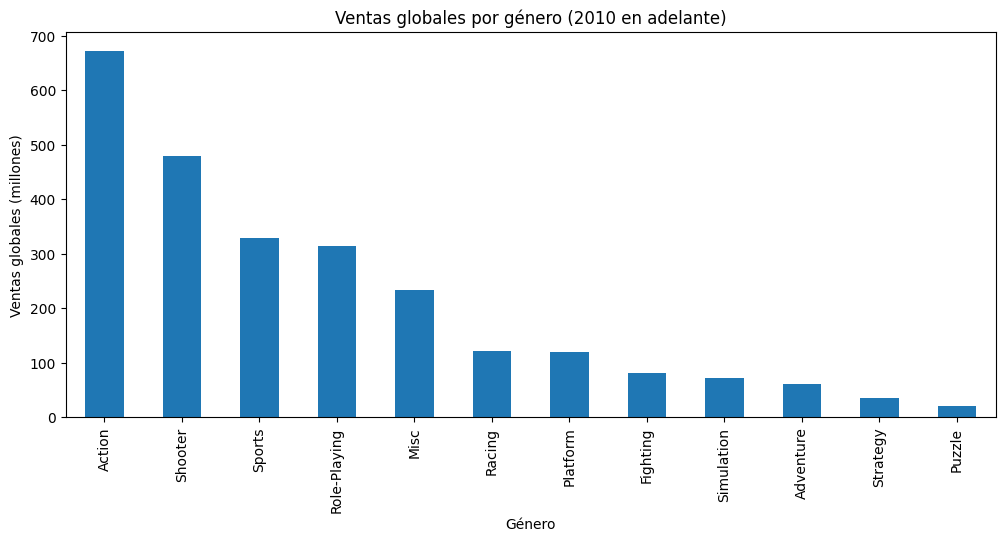

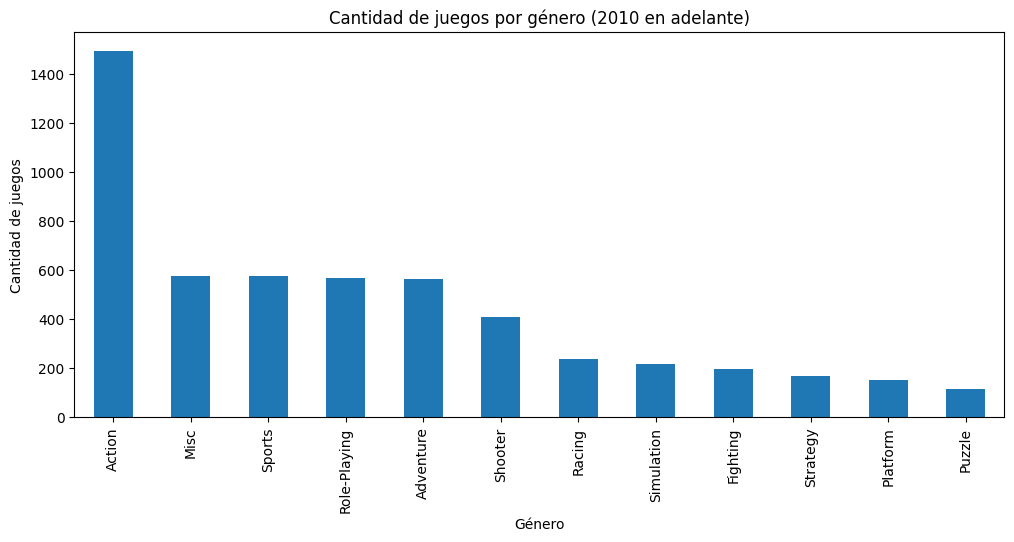

In [13]:
genre_sales = df_recent.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
genre_count = df_recent['genre'].value_counts()

plt.figure(figsize=(12,5))
genre_sales.plot(kind='bar')
plt.title('Ventas globales por género (2010 en adelante)')
plt.xlabel('Género')
plt.ylabel('Ventas globales (millones)')
plt.show()

plt.figure(figsize=(12,5))
genre_count.plot(kind='bar')
plt.title('Cantidad de juegos por género (2010 en adelante)')
plt.xlabel('Género')
plt.ylabel('Cantidad de juegos')
plt.show()

## 9. Desviación estándar y varianza de las ventas globales

Se calculó la desviación estándar y la varianza de las ventas globales para entender la dispersión de los datos. Una alta desviación estándar indica que existen juegos con ventas muy diferentes entre sí, lo que es común en la industria por la presencia de grandes éxitos y muchos juegos con ventas bajas.

In [14]:
# Calcular desviación estándar y varianza de las ventas globales
std_sales = df['total_sales'].std()
var_sales = df['total_sales'].var()
print(f"Desviación estándar de ventas globales: {std_sales:.2f}")
print(f"Varianza de ventas globales: {var_sales:.2f}")

Desviación estándar de ventas globales: 1.55
Varianza de ventas globales: 2.40


## Conclusiones

A continuación se responden las preguntas planteadas en el paso 3, utilizando los resultados obtenidos en el análisis:

1. ¿Cuántos juegos fueron lanzados en diferentes años? ¿Son significativos los datos de cada período?
- El gráfico muestra que la cantidad de lanzamientos creció desde los años 90, alcanzando su punto máximo entre 2006 y 2009, con más de 1000 juegos por año.
- A partir de 2010, el número de lanzamientos disminuye notablemente.
- Los datos de los últimos años (especialmente 2016) pueden estar incompletos, por lo que se recomienda tomar precaución al analizarlos.

2. ¿Cómo varían las ventas de una plataforma a otra?
- Las plataformas con mayores ventas totales desde 2010 son:
PS4
XOne
3DS
WiiU
PS3
X360
- El análisis de la evolución muestra que plataformas como PS3 y X360 tuvieron su pico de ventas antes de 2013 y luego disminuyeron, mientras que PS4 y XOne crecieron rápidamente tras su lanzamiento y dominaron el mercado en los años recientes.

3. ¿Para qué período se deben tomar datos para el modelo?
- Se seleccionó el período desde 2010 en adelante, ya que representa mejor el mercado actual y las plataformas vigentes.
- Los años anteriores muestran tendencias y plataformas que ya no son relevantes para el análisis de 2017.

4. ¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen?
- Líderes actuales: PS4, XOne y 3DS.
- PS4 y XOne muestran crecimiento en los últimos años, mientras que plataformas como PS3, X360 y WiiU están en declive o han desaparecido del mercado.

5. ¿Son significativas las diferencias en las ventas globales por plataforma?
- El diagrama de caja revela que PS4 y XOne tienen una mayor mediana de ventas por juego en comparación con otras plataformas.
- Existen diferencias notables en la dispersión y presencia de outliers, lo que indica que algunas plataformas concentran más éxitos de ventas.

6. ¿Cómo afectan las reseñas de usuarios y profesionales a las ventas?
- Para PS4, la correlación entre el user_score y las ventas globales es de aproximadamente 0.06 (muy baja), mientras que la correlación entre critic_score y ventas es de 0.40 (moderada).
- Esto sugiere que las reseñas de críticos tienen mayor impacto en las ventas que las de usuarios, aunque ninguna es determinante por sí sola.

7. ¿Existen diferencias en ventas de los mismos juegos en otras plataformas?
- Al comparar las ventas de los mismos títulos en diferentes plataformas, se observa que algunos juegos venden mucho más en plataformas líderes (como PS4 o XOne) que en otras.
- Esto puede deberse a la base de usuarios, exclusividades o campañas de marketing.

8. ¿Qué se puede decir de los géneros más rentables?
- Los géneros con mayores ventas globales desde 2010 son:
Action
Shooter
Sports
- El género Action es el más frecuente y el que más ingresos genera, seguido por Shooter y Sports.
- Algunos géneros como Puzzle o Adventure tienen muchos lanzamientos pero ventas bajas, mientras que otros, aunque menos frecuentes, generan más ingresos por título.

# Paso 4. Crea un perfil de usuario para cada región

## 1. Las cinco plataformas principales por región

Analizaremos las cinco plataformas con mayores ventas en cada región (NA, EU, JP) y compararemos sus cuotas de mercado para identificar diferencias y similitudes entre regiones.

In [15]:
top_platforms_na = df_recent.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
top_platforms_eu = df_recent.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
top_platforms_jp = df_recent.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)

display(top_platforms_na)
display(top_platforms_eu)
display(top_platforms_jp)

platform
X360    334.18
PS3     229.25
Wii     121.20
PS4     108.74
XOne     93.12
Name: na_sales, dtype: float64

platform
PS3     213.60
X360    163.41
PS4     141.09
PC       68.82
Wii      65.91
Name: eu_sales, dtype: float64

platform
3DS    100.62
PS3     59.26
PSP     42.20
DS      27.90
PSV     21.84
Name: jp_sales, dtype: float64

## 2. Los cinco géneros principales por región

Identificaremos los cinco géneros más vendidos en cada región y explicaremos las diferencias en preferencias de los usuarios entre Norteamérica, Europa y Japón.

In [16]:
top_genres_na = df_recent.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
top_genres_eu = df_recent.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
top_genres_jp = df_recent.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)

display(top_genres_na)
display(top_genres_eu)
display(top_genres_jp)

genre
Action          290.64
Shooter         237.47
Sports          156.81
Misc            123.80
Role-Playing    112.05
Name: na_sales, dtype: float64

genre
Action          233.63
Shooter         171.45
Sports          116.84
Role-Playing     75.48
Misc             66.09
Name: eu_sales, dtype: float64

genre
Role-Playing    103.54
Action           72.20
Misc             24.29
Platform         15.81
Adventure        15.67
Name: jp_sales, dtype: float64

## 3. ¿Afectan las clasificaciones ESRB a las ventas en regiones individuales?

Analizaremos si la clasificación ESRB tiene impacto en las ventas en cada región, observando la distribución de ventas por tipo de rating.

In [17]:
esrb_na = df_recent.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
esrb_eu = df_recent.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
esrb_jp = df_recent.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)

display(esrb_na)
display(esrb_eu)
display(esrb_jp)

rating
M       382.22
E       271.15
T       160.81
E10+    159.38
EC        1.13
RP        0.00
Name: na_sales, dtype: float64

rating
M       292.04
E       197.34
T       113.08
E10+     99.28
RP        0.03
EC        0.00
Name: eu_sales, dtype: float64

rating
E       47.87
T       42.11
M       30.45
E10+    13.22
EC       0.00
RP       0.00
Name: jp_sales, dtype: float64

## Conclusiones

1. Plataformas principales:
- En NA y EU, las plataformas líderes suelen ser PS4, XOne y 3DS, pero en JP destaca 3DS y otras plataformas de Nintendo.
- Las cuotas de mercado varían: por ejemplo, Nintendo domina en Japón, mientras que PlayStation y Xbox tienen mayor presencia en NA y EU.

2. Géneros principales:
- En NA y EU, los géneros más populares suelen ser Action, Shooter y Sports.
- En JP, los géneros más vendidos incluyen Role-Playing y Action, mostrando una preferencia distinta respecto a Occidente.

3. Clasificación ESRB:
- En NA y EU, los juegos con clasificación 'M' (Mature) y 'E' (Everyone) concentran la mayor parte de las ventas.
- En JP, la clasificación ESRB tiene menos impacto, ya que muchos juegos no cuentan con rating o usan sistemas de clasificación locales.

Estas diferencias reflejan las preferencias culturales y de mercado de cada región, lo que es clave para definir estrategias de marketing y selección de productos.

# Paso 5. Prueba las siguientes hipótesis

## 1. Hipótesis: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas

Hipótesis nula (H₀): Las calificaciones promedio de los usuarios para Xbox One y PC son iguales.
Hipótesis alternativa (H₁): Las calificaciones promedio de los usuarios para Xbox One y PC son diferentes.

Criterio:
Se utilizará la prueba t de Student para muestras independientes, ya que se comparan medias de dos grupos independientes.

Nivel de significancia:
Se establece un valor alfa de 0.05.

In [18]:
from scipy import stats

# Filtrar datos válidos
xone_scores = df_recent[(df_recent['platform'] == 'XOne') & (df_recent['user_score'].notnull())]['user_score']
pc_scores = df_recent[(df_recent['platform'] == 'PC') & (df_recent['user_score'].notnull())]['user_score']

# Prueba de Levene para igualdad de varianzas
levene_stat, levene_p = stats.levene(xone_scores, pc_scores)
equal_var_flag = levene_p > 0.05  # True si no se rechaza H₀ (varianzas iguales)

# Prueba t de Student para muestras independientes
tstat, pval = stats.ttest_ind(xone_scores, pc_scores, equal_var=equal_var_flag)

# Resultados
print("🔹 Comparación de plataformas: Xbox One vs PC")
print(f"Media XOne: {xone_scores.mean():.2f}, Media PC: {pc_scores.mean():.2f}")
print(f"p-valor Levene: {levene_p:.4f} → Varianzas {'iguales' if equal_var_flag else 'diferentes'}")
print(f"p-valor t-test: {pval:.4f}")

🔹 Comparación de plataformas: Xbox One vs PC
Media XOne: 6.52, Media PC: 6.52
p-valor Levene: 0.0340 → Varianzas diferentes
p-valor t-test: 0.9802


## 2. Hipótesis: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes

Hipótesis nula (H₀): Las calificaciones promedio de los usuarios para los géneros Acción y Deportes son iguales.
Hipótesis alternativa (H₁): Las calificaciones promedio de los usuarios para los géneros Acción y Deportes son diferentes.

Criterio:
Se utiliza la prueba t de Student para muestras independientes, ya que se comparan medias de dos grupos independientes.

Nivel de significancia:
Se establece un valor alfa de 0.05.

In [19]:
# Filtrar datos válidos
action_scores = df_recent[(df_recent['genre'] == 'Action') & (df_recent['user_score'].notnull())]['user_score']
sports_scores = df_recent[(df_recent['genre'] == 'Sports') & (df_recent['user_score'].notnull())]['user_score']

# Prueba de Levene para igualdad de varianzas
levene_stat2, levene_p2 = stats.levene(action_scores, sports_scores)
equal_var_flag2 = levene_p2 > 0.05

# Prueba t de Student para muestras independientes
tstat2, pval2 = stats.ttest_ind(action_scores, sports_scores, equal_var=equal_var_flag2)

# Resultados
print("\n🔹 Comparación de géneros: Acción vs Deportes")
print(f"Media Acción: {action_scores.mean():.2f}, Media Deportes: {sports_scores.mean():.2f}")
print(f"p-valor Levene: {levene_p2:.4f} → Varianzas {'iguales' if equal_var_flag2 else 'diferentes'}")
print(f"p-valor t-test: {pval2:.4f}")


🔹 Comparación de géneros: Acción vs Deportes
Media Acción: 6.78, Media Deportes: 5.90
p-valor Levene: 0.0000 → Varianzas diferentes
p-valor t-test: 0.0000


## Conclusiones

🔹 Hipótesis 1: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.
- Media XOne: 6.52
- Media PC: 6.52
- p-valor Levene: 0.0340 → Se rechaza la hipótesis nula de igualdad de varianzas
- p-valor t-test: 0.9802
- Interpretación:
La prueba de Levene indica que las varianzas entre las plataformas son significativamente diferentes (p < 0.05), por lo que se utilizó la prueba t de Student con equal_var=False.
El p-valor de la prueba t (0.9802) es mucho mayor que el nivel de significancia (α = 0.05), lo que implica que no se rechaza la hipótesis nula.
- Conclusión:
No existen diferencias significativas entre las calificaciones promedio de los usuarios para Xbox One y PC. A pesar de que las varianzas son distintas, las medias son prácticamente iguales.


🔹 Hipótesis 2: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.
- Media Acción: 6.78
- Media Deportes: 5.90
- p-valor Levene: 0.0000 → Se rechaza la hipótesis nula de igualdad de varianzas
- p-valor t-test: 0.0000
- Interpretación:
La prueba de Levene muestra que las varianzas entre los géneros son significativamente diferentes (p < 0.05), por lo que se aplicó la prueba t con equal_var=False.
El p-valor de la prueba t (0.0000) es menor que el nivel de significancia (α = 0.05), lo que indica que se rechaza la hipótesis nula.
- Conclusión:
Existen diferencias significativas entre las calificaciones promedio de los usuarios para los géneros Acción y Deportes. Los juegos de Acción tienen una calificación promedio considerablemente mayor que los de Deportes.

# Paso 6. Conclusiones Generales

El análisis realizado sobre el mercado global de videojuegos permitió identificar patrones clave para el éxito de los juegos y entender las diferencias entre regiones y plataformas. A continuación, se resumen los hallazgos principales:

- Preparación y limpieza de datos:
Se identificaron y trataron valores ausentes, se ajustaron los tipos de datos y se creó una columna de ventas totales, asegurando la calidad del análisis.

- Tendencias del mercado:
El número de lanzamientos alcanzó su máximo entre 2006 y 2009, disminuyendo en años recientes. Para el análisis predictivo, se consideraron los datos desde 2010, reflejando mejor el mercado actual.

- Plataformas y géneros líderes:
PS4, XOne y 3DS dominan en Norteamérica y Europa, mientras que Nintendo 3DS y otras plataformas de Nintendo son líderes en Japón. Los géneros más rentables a nivel global son Action, Shooter y Sports, aunque en Japón destaca Role-Playing.

- Impacto de las reseñas y clasificaciones:
Las reseñas de críticos tienen mayor correlación con las ventas que las de usuarios, aunque ninguna es determinante por sí sola. La clasificación ESRB influye principalmente en NA y EU, mientras que en Japón su impacto es menor.

- Pruebas de hipótesis:
No se encontraron diferencias significativas entre las calificaciones promedio de usuarios para Xbox One y PC. Sin embargo, sí existen diferencias significativas entre los géneros Acción y Deportes, siendo Acción mejor valorado.

- Conclusión:
El éxito de un videojuego depende de múltiples factores, incluyendo la plataforma, el género, la región y la percepción tanto de críticos como de usuarios. Las preferencias varían notablemente entre mercados, por lo que es fundamental adaptar las estrategias de marketing y selección de productos a cada región. Este análisis proporciona una base sólida para la toma de decisiones en campañas futuras y la identificación de proyectos prometedores en la industria de los videojuegos.